In [2]:
!pip install category_encoders
!pip install imbalanced-learn
#!pip install -U scikti-learn
#!pip install -U imbalanced-learn
!pip install pdpbox
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 80 kB 2.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 176 kB/s 
     |████████████████████████████████| 13.1 MB 31.4 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=b87d95ba896b6c21ee662faa449926d07cd268538c112adf106307a6d7074a26
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
Successfully built pdpbox
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all th

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 1.1 MB/s 


In [3]:
import pandas as pd
from google.colab import drive
import warnings
warnings.filterwarnings('ignore')

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/project/data.csv', encoding='latin_1')
# companies원본으로 할때는 '|' 이 문자열이 변환이 되지않고 갯수도 이상하게 계산했다. 그래서 결국 엑셀파일에서 수정해서 가져왔는데 무엇이 문제였을지 아직도 해결하진 못했다.
df

,name,market,funding_total_usd,status,country_code,state_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,Verizon Communications,Mobile,30079503000,ipo,USA,NY,New York,5,2015-04-19,2010-01-26,2014-02-28
1,Uber,Real Time,7007450000,operating,USA,CA,San Francisco,12,NaN,2009-08-01,2015-08-19
2,Sberbank,Finance,5800000000,ipo,RUS,NaN,Moscow,1,2014-04-01,2014-07-07,2014-07-07
3,Clearwire,Mobile,5720000000,acquired,USA,WA,Kirkland,5,2012-06-01,2001-12-11,2013-02-27
4,Charter Communications,Telecommunications,5162513431,ipo,USA,CT,Stamford,2,NaN,2009-11-21,2014-09-15
...,...,...,...,...,...,...,...,...,...,...,...
61393,"Zymr, Inc.",Cloud Infrastructure,0,operating,USA,CA,Santa Clara,3,1999-01-01,2012-12-12,2014-01-01
61394,Zynergy Projects & Services,Clean Technology,0,operating,IND,NaN,Chennai,1,2006-01-01,2015-08-19,2015-08-19
61395,Zype,Video,0,operating,USA,NY,New York,1,2013-01-01,2015-04-01,2015-04-01
61396,[24]7,Predictive Analytics,0,operating,USA,CA,Campbell,1,NaN,2003-07-01,2003-07-01


# 데이터 랭글링
1. Discovering  - 데이터에 대한 깊은 이해를 하는 단계

In [6]:
data_count = df.shape[0]
feature_count = df.shape[1]
print('data_count: %s' % data_count, 'feature_count: %s' % feature_count) # %문자  % 입력값  1:1에 맞춰서 대입

data_count: 61398 feature_count: 11


In [7]:
df2 = df.copy()
# df = 원본, df2 = 수정데이터셋

In [8]:
df['status'].unique()

array(['ipo', 'operating', 'acquired', 'closed'], dtype=object)

In [9]:
df.isnull().sum()

name                     1
market                2757
funding_total_usd        0
status                   0
country_code          5512
state_code           24174
city                  6517
funding_rounds           0
founded_at           13609
first_funding_at        13
last_funding_at          0
dtype: int64

In [10]:
import numpy as np

In [11]:
# 업종의 경우 788개라는 많은 카달리스트가 있다. 따라서 해당업종이 상위 20위 이후로 창업하는 경우 etc로 묶어버리는 새로운 피처를 만들어야겠다.
a = df['market'].value_counts().head(20)
a = a.reset_index()
b = np.array(a['index'])
test_list = b

def jung(i):
  if i in test_list:
    return i
  else:
    return 'etc' 

df2['market']=df['market'].apply(jung)
df2['market'].value_counts().head(21)

etc                    29735
Software                5610
Biotechnology           4110
Mobile                  2348
E-Commerce              2209
Curated Web             1778
Enterprise Software     1465
Games                   1351
Clean Technology        1322
Advertising             1268
Health Care             1234
Hardware + Software     1183
Health and Wellness     1158
Education               1094
Finance                 1056
Social Media            1050
Manufacturing            891
Analytics                767
Security                 623
Consulting               576
Apps                     570
Name: market, dtype: int64

In [12]:
c = df['country_code'].value_counts().head(20)
c = c.reset_index()
d = np.array(c['index'])
test_list2 = d

def jung2(i):
  if i in test_list2:
    return i
  else:
    return 'etc'

df2['country_code']=df['country_code'].apply(jung2)
df2['country_code'].value_counts().head(21)

USA    35497
etc     9497
GBR     3442
CAN     1789
CHN     1473
IND     1355
DEU     1263
FRA     1050
ISR      887
ESP      710
NLD      456
AUS      451
RUS      448
SGP      420
IRL      419
BRA      406
SWE      403
JPN      383
ITA      380
KOR      337
CHL      332
Name: country_code, dtype: int64

In [13]:
# 설립일의 결측치가 많고 첫투자일이 설립일보다 앞선데이터도 많아서 첫투자받은날을 하려다가 연도별 업종의 트렌드를 알려면 사업을 시작한날을 기준으로 해야될꺼같아서 결측치는 제거하고 하기로 결정했다.
df2 = df2.dropna(subset=['founded_at'])
df2.shape

(47789, 11)

In [14]:
def jung3(i):
  return int(i.replace('-',''))

df2['founded_at'] = df2['founded_at'].apply(jung3)

In [15]:
# 1592년부터 2015년까지 존재
df2.describe()

,funding_total_usd,funding_rounds,founded_at
count,4.778900e+04,47789.000000,4.778900e+04
mean,1.382164e+07,1.714139,2.007696e+07
std,1.611460e+08,1.324732,1.131837e+05
min,0.000000e+00,1.000000,1.592010e+07
25%,4.000000e+04,1.000000,2.006010e+07
50%,9.500000e+05,1.000000,2.010050e+07
75%,6.327003e+06,2.000000,2.012090e+07
max,3.007950e+10,19.000000,2.914010e+07


In [16]:
df3 = df2.copy()
df3

,name,market,funding_total_usd,status,country_code,state_code,city,funding_rounds,founded_at,first_funding_at,last_funding_at
0,Verizon Communications,Mobile,30079503000,ipo,USA,NY,New York,5,20150419,2010-01-26,2014-02-28
2,Sberbank,Finance,5800000000,ipo,RUS,NaN,Moscow,1,20140401,2014-07-07,2014-07-07
3,Clearwire,Mobile,5720000000,acquired,USA,WA,Kirkland,5,20120601,2001-12-11,2013-02-27
5,Alibaba,E-Commerce,4812000000,ipo,CHN,NaN,Hangzhou,7,20121026,1999-10-01,2014-04-01
6,Ping An,etc,4745460219,operating,CHN,NaN,NaN,1,20100501,2014-12-01,2014-12-01
...,...,...,...,...,...,...,...,...,...,...,...
61391,Zymochem,etc,0,operating,etc,NaN,NaN,1,20000401,2015-01-06,2015-01-06
61393,"Zymr, Inc.",etc,0,operating,USA,CA,Santa Clara,3,19990101,2012-12-12,2014-01-01
61394,Zynergy Projects & Services,Clean Technology,0,operating,IND,NaN,Chennai,1,20060101,2015-08-19,2015-08-19
61395,Zype,etc,0,operating,USA,NY,New York,1,20130101,2015-04-01,2015-04-01


In [17]:
def jung4(i):
  if  20110000 < i < 20160000:
    return '2011~2015'
  elif 20060000 < i < 20110000:
    return '2006~2010'
  else:
    return '~2005'

df3['founded_at']=df2['founded_at'].apply(jung4)
df3['founded_at'].value_counts()

2011~2015    22513
2006~2010    14386
~2005        10890
Name: founded_at, dtype: int64

# 연도별 업종 트렌드

In [18]:
df4 = df3.drop(['name', 'state_code', 'city','first_funding_at','last_funding_at' ], axis = 1)
df_year_market = df4[['market','founded_at']]

In [19]:
df_year_market

,market,founded_at
0,Mobile,2011~2015
2,Finance,2011~2015
3,Mobile,2011~2015
5,E-Commerce,2011~2015
6,etc,2006~2010
...,...,...
61391,etc,~2005
61393,etc,~2005
61394,Clean Technology,2006~2010
61395,etc,2011~2015


In [20]:
str_expr = "founded_at == '2011~2015'"
sample = df_year_market.query(str_expr)
sample

,market,founded_at
0,Mobile,2011~2015
2,Finance,2011~2015
3,Mobile,2011~2015
5,E-Commerce,2011~2015
7,etc,2011~2015
...,...,...
61384,etc,2011~2015
61388,Software,2011~2015
61390,Mobile,2011~2015
61395,etc,2011~2015


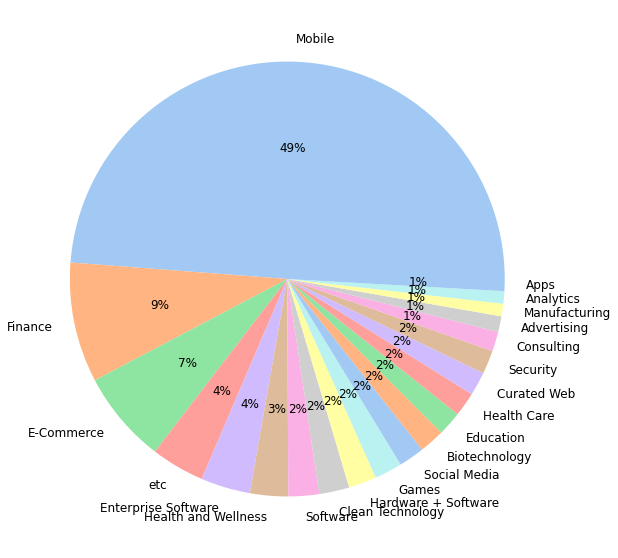

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=12) #폰트크기
plt.figure(figsize=(10,10)) 
label = sample['market'].unique()
data = sample['market'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(data, labels = label,colors = colors,autopct='%.0f%%')
plt.show()

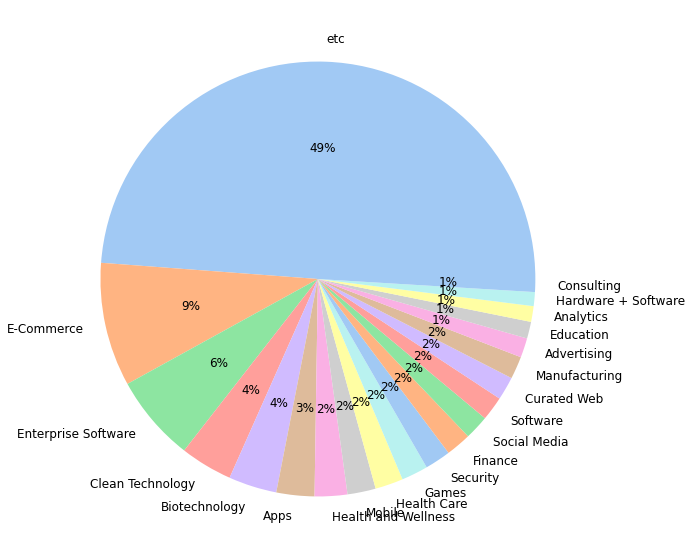

In [22]:
str_expr2 = "founded_at == '2006~2010'"
sample2 = df_year_market.query(str_expr2)

plt.rc('font', size=12)
plt.figure(figsize=(10,10)) 
label = sample2['market'].unique()
data = sample2['market'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(data, labels = label,colors = colors,autopct='%.0f%%')
plt.show()

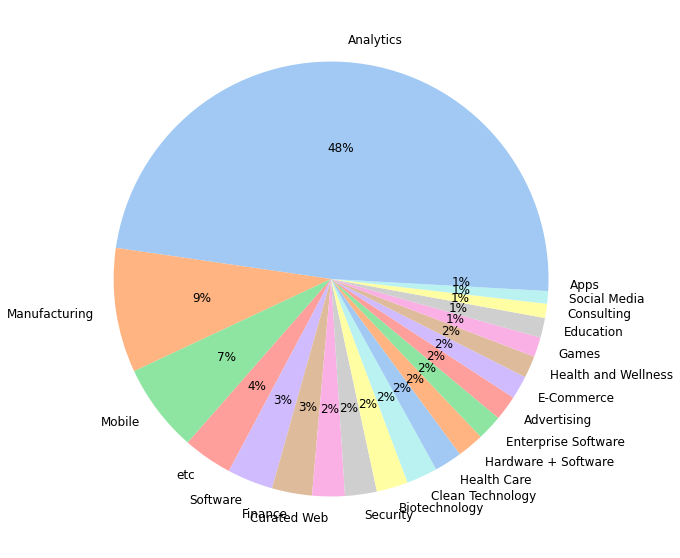

In [23]:
str_expr3 = "founded_at == '~2005'"
sample3 = df_year_market.query(str_expr3)

plt.rc('font', size=12)
plt.figure(figsize=(10,10)) 
label = sample3['market'].unique()
data = sample3['market'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(data, labels = label,colors = colors,autopct='%.0f%%')
plt.show()

# 업종별 국가 선호도

In [24]:
df4

,market,funding_total_usd,status,country_code,funding_rounds,founded_at
0,Mobile,30079503000,ipo,USA,5,2011~2015
2,Finance,5800000000,ipo,RUS,1,2011~2015
3,Mobile,5720000000,acquired,USA,5,2011~2015
5,E-Commerce,4812000000,ipo,CHN,7,2011~2015
6,etc,4745460219,operating,CHN,1,2006~2010
...,...,...,...,...,...,...
61391,etc,0,operating,etc,1,~2005
61393,etc,0,operating,USA,3,~2005
61394,Clean Technology,0,operating,IND,1,2006~2010
61395,etc,0,operating,USA,1,2011~2015


In [25]:
tt = df4.groupby(['country_code']).sum().reset_index()
tt['average_funding_once'] = tt['funding_total_usd'] / tt['funding_rounds']
tt = tt.sort_values('funding_total_usd',ascending = False)

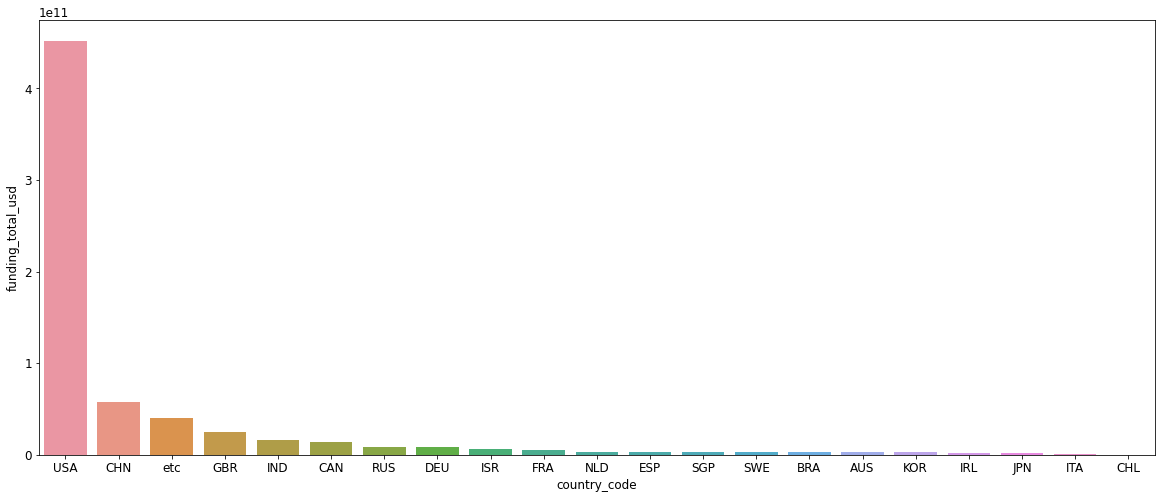

In [26]:
plt.rc('font', size=12)
plt.figure(figsize=(20,8)) 
ax = sns.barplot(x="country_code", y="funding_total_usd", data=tt)
plt.show()

In [27]:
tt2 = tt.sort_values('average_funding_once',ascending = False)

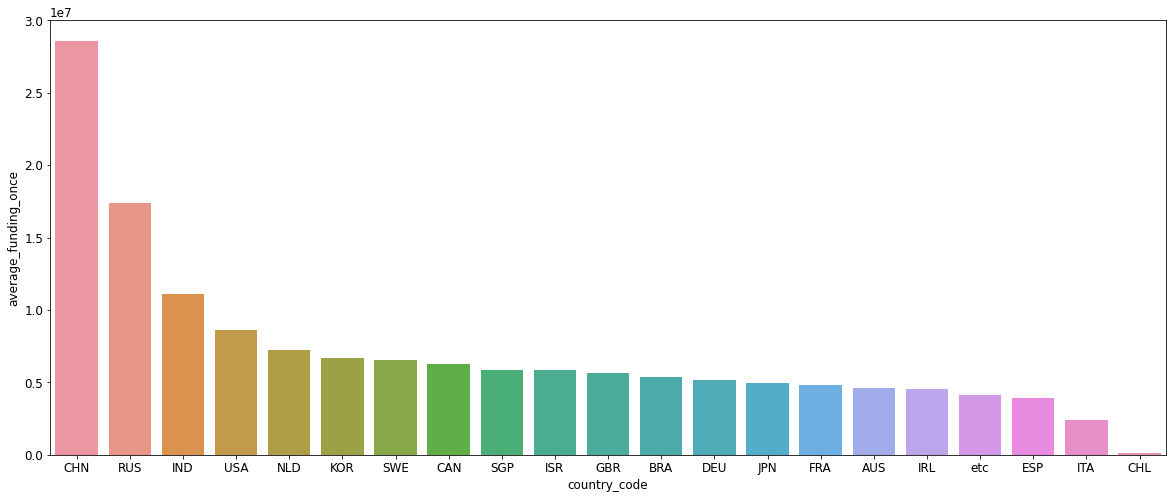

In [28]:
plt.rc('font', size=12)
plt.figure(figsize=(20,8)) 
ax = sns.barplot(x="country_code", y="average_funding_once", data=tt2)
plt.show()

# 업종별 투자금액

In [29]:
tt3 = df4.groupby(['market']).sum().reset_index()
tt3['average_funding_once'] = tt2['funding_total_usd'] / tt2['funding_rounds']
tt3 = tt3.sort_values('average_funding_once',ascending = False)

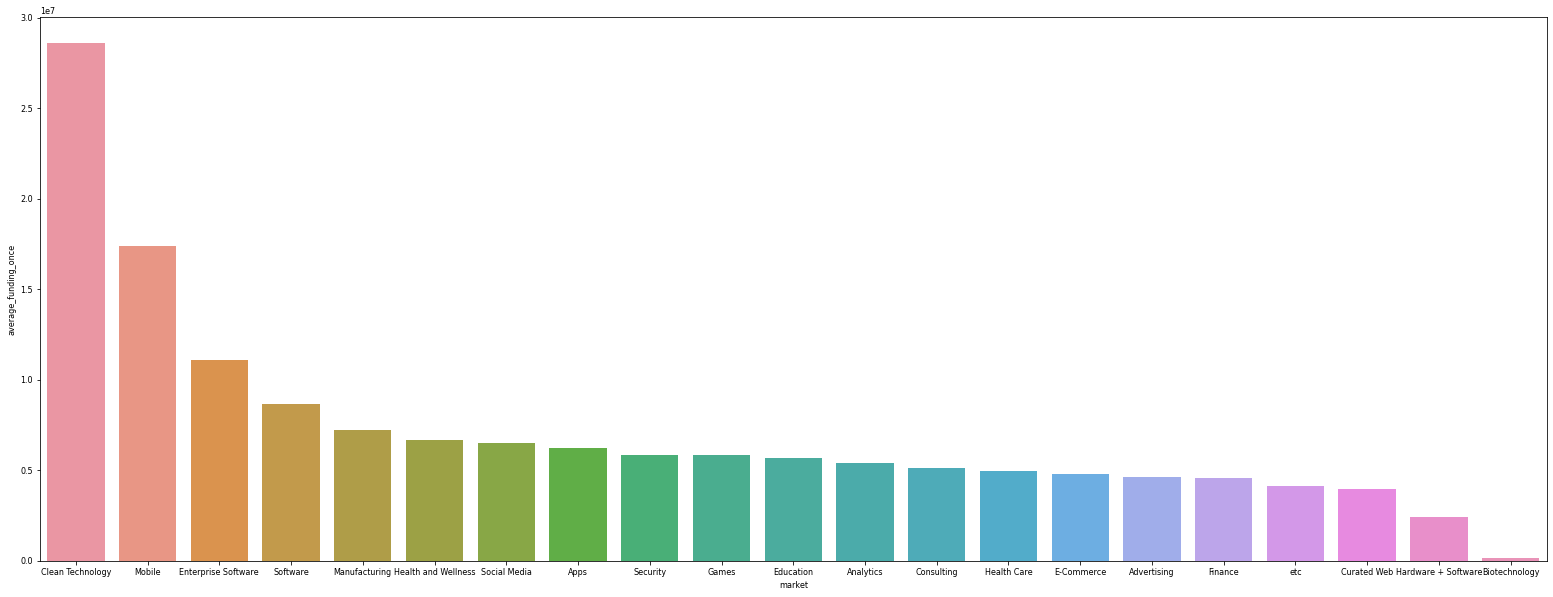

In [30]:
plt.rc('font', size=8)
plt.figure(figsize=(27,10)) 
ax = sns.barplot(x="market", y="average_funding_once", data=tt3)
plt.show()

# 최종 데이터셋

In [31]:
# 타겟을 2개 성공, 실패로 변경 시 사용 함수
test_list5 = ['ipo','acquired'] 
def status(i):
  if i in test_list5:
    return 'success'
  else:
    return i 

In [32]:
df5 = df4.copy()
df5

,market,funding_total_usd,status,country_code,funding_rounds,founded_at
0,Mobile,30079503000,ipo,USA,5,2011~2015
2,Finance,5800000000,ipo,RUS,1,2011~2015
3,Mobile,5720000000,acquired,USA,5,2011~2015
5,E-Commerce,4812000000,ipo,CHN,7,2011~2015
6,etc,4745460219,operating,CHN,1,2006~2010
...,...,...,...,...,...,...
61391,etc,0,operating,etc,1,~2005
61393,etc,0,operating,USA,3,~2005
61394,Clean Technology,0,operating,IND,1,2006~2010
61395,etc,0,operating,USA,1,2011~2015


In [33]:
df5['status'] = df4['status'].apply(status) 
df5['status'].value_counts()

operating    40422
success       4881
closed        2486
Name: status, dtype: int64

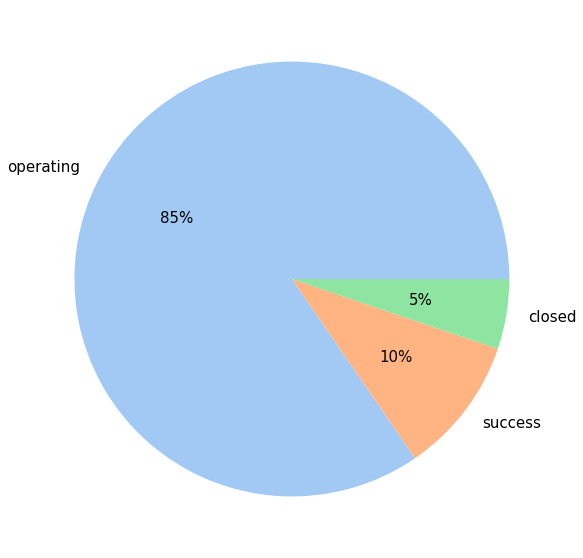

In [34]:
plt.rc('font', size=15)
plt.figure(figsize=(10,10)) 
label = ['operating','success','closed']
data = df5['status'].value_counts()
colors = sns.color_palette('pastel')
plt.pie(data, labels = label,colors = colors,autopct='%.0f%%')
plt.show()

<function matplotlib.pyplot.show>

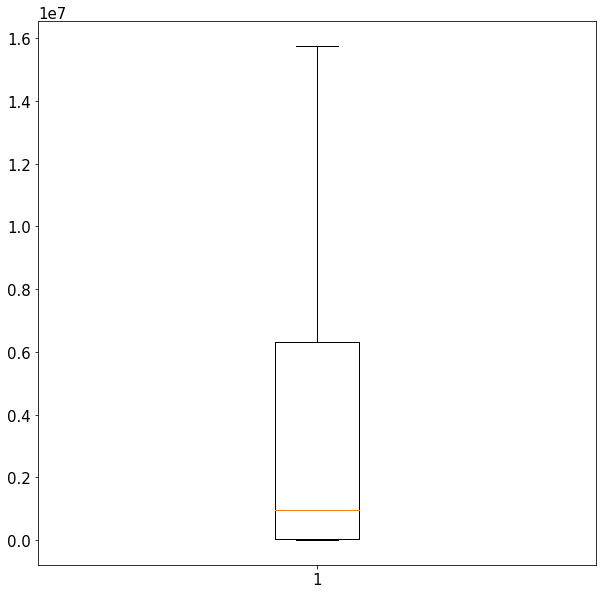

In [35]:
q1 = df5['funding_total_usd'].quantile(q=0.25)
q3 = df5['funding_total_usd'].quantile(q=0.75)
IQR = q3-q1
min = q1-(1.5*IQR)
max = q3+(1.5*IQR)

line_d = q1 - IQR*1.5
line_u = q3 + IQR*1.5
ww2 = df5['funding_total_usd'].clip(line_d,line_u)

plt.figure(figsize=(10,10))
plt.boxplot(ww2)
plt.show

In [36]:
con = "(funding_total_usd >= -9390504.5) and (funding_total_usd <= 15757507.5)"    # 나이가 10 이다 (비교연산자 ==)
df6 = df5.query(con)
df6

,market,funding_total_usd,status,country_code,funding_rounds,founded_at
8981,Hardware + Software,15751549,operating,USA,3,2011~2015
8982,Manufacturing,15750759,operating,GBR,2,2011~2015
8984,Software,15750000,operating,etc,1,~2005
8985,etc,15750000,operating,USA,2,~2005
8987,Software,15725816,operating,USA,4,~2005
...,...,...,...,...,...,...
61391,etc,0,operating,etc,1,~2005
61393,etc,0,operating,USA,3,~2005
61394,Clean Technology,0,operating,IND,1,2006~2010
61395,etc,0,operating,USA,1,2011~2015


<function matplotlib.pyplot.show>

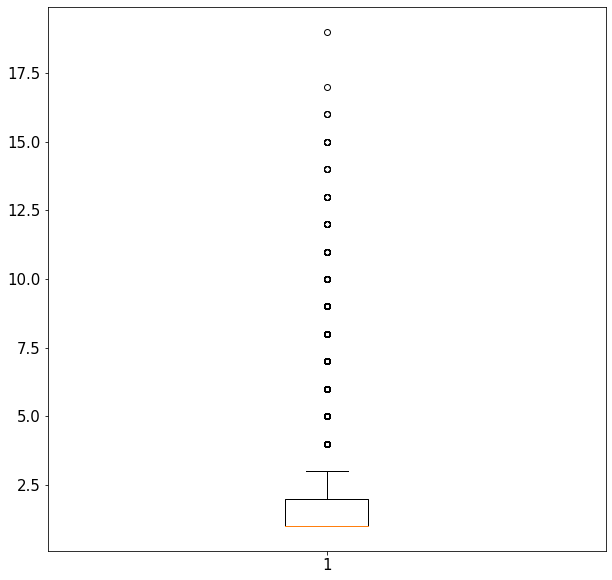

In [37]:
plt.figure(figsize=(10,10))
plt.boxplot(df5['funding_rounds'])
plt.show

In [38]:
# df5 이상치 제거x , df6 이상치 제거

In [39]:
df_fin = df5.copy()
df_fin['average_funding_once'] = df5['funding_total_usd'] / df5['funding_rounds']
df_fin = df_fin.drop(['funding_total_usd'], axis = 1)
df_fin

,market,status,country_code,funding_rounds,founded_at,average_funding_once
0,Mobile,success,USA,5,2011~2015,6.015901e+09
2,Finance,success,RUS,1,2011~2015,5.800000e+09
3,Mobile,success,USA,5,2011~2015,1.144000e+09
5,E-Commerce,success,CHN,7,2011~2015,6.874286e+08
6,etc,operating,CHN,1,2006~2010,4.745460e+09
...,...,...,...,...,...,...
61391,etc,operating,etc,1,~2005,0.000000e+00
61393,etc,operating,USA,3,~2005,0.000000e+00
61394,Clean Technology,operating,IND,1,2006~2010,0.000000e+00
61395,etc,operating,USA,1,2011~2015,0.000000e+00


1. name = 회사명
2. market = 업종 
3. funding_total_usd = 총 투자받은금액
4. status = 상태(target)
5. country_code = 국가코드
6. state_code = 지역코드
7. city = 도시
8. funding_rounds = 투자받은 횟수
9. founded_at = 설립일
10. first_funding_at = 처음 투자받은날
11. last_funding_at = 마지막 투자받은날

미국 증권 거래 위원회(SEC) 는 IPO를 기업 이 주식을 대중에게 처음으로 판매하는 최초 공모로 정의합니다. 따라서 ipo는 성공으로 봐도 될꺼같습니다.
acquired는 인수로 보여집니다.

따라서 결론적으로
기본모델은 0.94로 보여집니다.
추후 작업에 클래스웨이트, 언더샘플링이나 오버샘플링등 데이터불균형을 교정을 해야될꺼같습니다.

In [40]:
from sklearn.model_selection import train_test_split

In [182]:
target = 'status'
train, test = train_test_split(df_fin, train_size=0.80, test_size=0.20, 
                              stratify=df_fin[target], random_state=2)
val, test = train_test_split(test, train_size=0.50, test_size=0.50, 
                              stratify=test[target], random_state=2)

In [183]:
train.shape,val.shape, test.shape

((38231, 6), (4779, 6), (4779, 6))

In [105]:
X_train = train.drop(columns=target)
y_train = train[target]
X_test = test.drop(columns=target)
y_test = test[target]

In [106]:
from collections import Counter
Counter(y_test)

Counter({'closed': 497, 'operating': 8085, 'success': 976})

# 오버샘플링 smote
최근접 군집기법(K-Nearest Neighbor)을 사용하여 sampling을 하고자하는 데이터를 랜덤하게 뽑아내어 증식시키는 방법

In [145]:
from sklearn import metrics
from category_encoders import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(),
    StandardScaler(),
    KNeighborsClassifier()) # n_neighbors=5 디폴트값

pipe.fit(X_train, y_train)

print('훈련 정확도: ', pipe.score(X_train, y_train))
print('테스트 정확도: ', pipe.score(X_test, y_test))

훈련 정확도:  0.8528157777719652
테스트 정확도:  0.8267419962335216


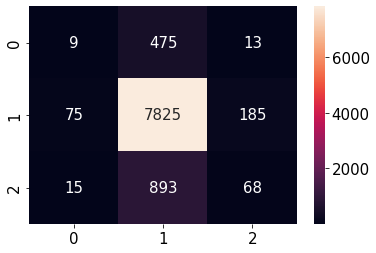

In [146]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

pred = pipe.predict(X_test)

cm = confusion_matrix(y_test, pred) 
sns.heatmap(cm, annot=True, fmt="d")

In [147]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

      closed       0.09      0.02      0.03       497
   operating       0.85      0.97      0.91      8085
     success       0.26      0.07      0.11       976

    accuracy                           0.83      9558
   macro avg       0.40      0.35      0.35      9558
weighted avg       0.75      0.83      0.78      9558



정확도는 매우 높으나 정밀도, 재현율, f1스코어가 너무 낮아서 사용할수 없는 모델이다. 다중분류에선 자기 클래스는 Positive, 나머지는 모두 Negative로 하여 계산


In [160]:
ord = OrdinalEncoder()
X_train_encoder = ord.fit_transform(X_train)
X_test_encoder = ord.transform(X_test)

# 오버, 언더샘플링 비교

In [115]:
# 언더샘플링
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_train_under, y_train_under = nr.fit_resample(X_train_encoder, y_train)
y_train_under.value_counts()

closed       1989
operating    1989
success      1989
Name: status, dtype: int64

In [181]:
# 오버샘플링
# 학습할 데이터의 불균형 해결을 하면 되는것으로 판단된다. 왜냐면 오버샘플링을 하는이유는 모델링할때 데이터의 불균형때매 과적합이라던지 재현율이 매우낮다 따라서 해보자
smote = SMOTE(k_neighbors=4, random_state=2, n_jobs=-1)
X_train_over,y_train_over = smote.fit_resample(X_train_encoder,y_train)
y_train_over.value_counts()

operating    32337
success      32337
closed       32337
Name: status, dtype: int64

In [175]:
pipe2 = make_pipeline(
        RobustScaler(),
        KNeighborsClassifier()) # n_neighbors=5 디폴트값

pipe2.fit(X_train_under, y_train_under)

print('훈련 정확도: ', pipe2.score(X_train_under, y_train_under))
print('테스트 정확도: ', pipe2.score(X_test_encoder, y_test))

훈련 정확도:  0.4674040556393498
테스트 정확도:  0.09876543209876543


In [176]:
pipe2 = make_pipeline(
        RobustScaler(),
        KNeighborsClassifier()) # n_neighbors=5 디폴트값

pipe2.fit(X_train_over, y_train_over)

print('훈련 정확도: ', pipe2.score(X_train_over, y_train_over))
print('테스트 정확도: ', pipe2.score(X_test_encoder, y_test))

훈련 정확도:  0.6603890280483656
테스트 정확도:  0.6377903327055869


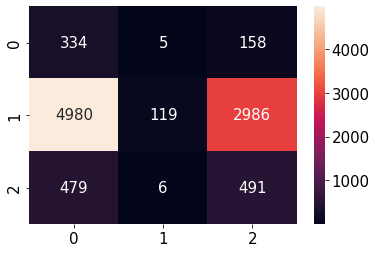

In [129]:
pred2 = pipe2.predict(X_test_encoder)

cm2 = confusion_matrix(y_test, pred2) 
sns.heatmap(cm2, annot=True, fmt="d")

In [177]:
# 오버샘플링을 사용하니 정확도는 많이 떨어졌지만 재현율,f1스코어는 올라갔다.
precision_2 = precision_score(y_test,pred2, average = 'macro')
recall_2 = recall_score(y_test,pred2, average = 'macro')
f1_2 = f1_score(y_test,pred2, average = 'macro') 
print('정밀도: {0:.4f}, 재현율: {1:.4f}, f1: {2:4f}'.format(precision_2, recall_2,f1_2))

정밀도: 0.3694, 재현율: 0.3966, f1: 0.116047


In [178]:
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

      closed       0.06      0.67      0.11       497
   operating       0.92      0.01      0.03      8085
     success       0.14      0.50      0.21       976

    accuracy                           0.10      9558
   macro avg       0.37      0.40      0.12      9558
weighted avg       0.79      0.10      0.05      9558



In [179]:
from sklearn.model_selection import RandomizedSearchCV

pipe3 = make_pipeline(
        RobustScaler(),
        KNeighborsClassifier())

dists = {
    'kneighborsclassifier__n_neighbors' : [3,5,7,9],
    'kneighborsclassifier__weights' : ['uniform','distance'],
    'kneighborsclassifier__metric' : ['euclidean','manhattan','chebyshev','seuclidean','minkowski']
}

clf= RandomizedSearchCV(
    pipe3,
    param_distributions=dists, # 파라미터 입력
    n_iter = 50,   # random search 탐색 횟수
    cv = 5,        # cv 검증을 위한 분할 검증 횟수
    scoring='f1',  # 오차 평가방법
    verbose=1,     # 진행상황
    random_state = 2
  )

clf.fit(X_train_over, y_train_over)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


KeyboardInterrupt: ignored

In [149]:
y_test_pred = clf.predict(X_test_encoder)

print('최적 하이퍼파라미터: ', clf.best_params_)
print('검증 정확도:', clf.best_score_)
print('F1:',f1_score(y_test, y_test_pred, average = 'macro'))

최적 하이퍼파라미터:  {'kneighborsclassifier__weights': 'uniform', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__metric': 'euclidean'}
검증 정확도: nan
F1: 0.37231396623200447


# 랜덤포레스트보다 knn이 더 잘나옴

In [132]:
from sklearn.ensemble import RandomForestClassifier

pipe4 = make_pipeline(
        RobustScaler(),
        RandomForestClassifier()
        )

pipe4.fit(X_train_over, y_train_over)
pred4 = pipe4.predict(X_test_encoder)
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

      closed       0.08      0.27      0.12       497
   operating       0.88      0.65      0.74      8085
     success       0.18      0.35      0.24       976

    accuracy                           0.60      9558
   macro avg       0.38      0.42      0.37      9558
weighted avg       0.76      0.60      0.66      9558



In [180]:
# 최적파라미터는 uniform으로 나오나 distance시 가장 높은 점수가 나온다
pipe4 = make_pipeline(
        RobustScaler(),
        KNeighborsClassifier(weights = 'distance', n_neighbors = 3, metric = 'euclidean')
        )

pipe4.fit(X_train_over, y_train_over)
pred4 = pipe4.predict(X_test_encoder)
print(classification_report(y_test, pred4))

              precision    recall  f1-score   support

      closed       0.07      0.19      0.11       497
   operating       0.87      0.71      0.78      8085
     success       0.18      0.30      0.23       976

    accuracy                           0.64      9558
   macro avg       0.37      0.40      0.37      9558
weighted avg       0.76      0.64      0.69      9558



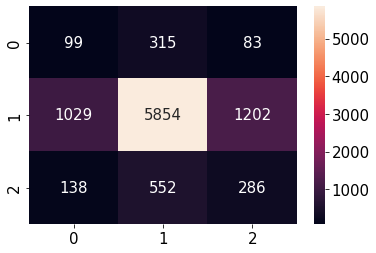

In [155]:
pred4 = pipe4.predict(X_test_encoder)

cm4 = confusion_matrix(y_test, pred4) 
sns.heatmap(cm4, annot=True, fmt="d")

In [158]:
df_fin

,market,status,country_code,funding_rounds,founded_at,average_funding_once
0,Mobile,success,USA,5,2011~2015,6.015901e+09
2,Finance,success,RUS,1,2011~2015,5.800000e+09
3,Mobile,success,USA,5,2011~2015,1.144000e+09
5,E-Commerce,success,CHN,7,2011~2015,6.874286e+08
6,etc,operating,CHN,1,2006~2010,4.745460e+09
...,...,...,...,...,...,...
61391,etc,operating,etc,1,~2005,0.000000e+00
61393,etc,operating,USA,3,~2005,0.000000e+00
61394,Clean Technology,operating,IND,1,2006~2010,0.000000e+00
61395,etc,operating,USA,1,2011~2015,0.000000e+00


In [167]:
y_test.value_counts() #0 = closed, 1 = success, 2=operating

operating    8085
success       976
closed        497
Name: status, dtype: int64

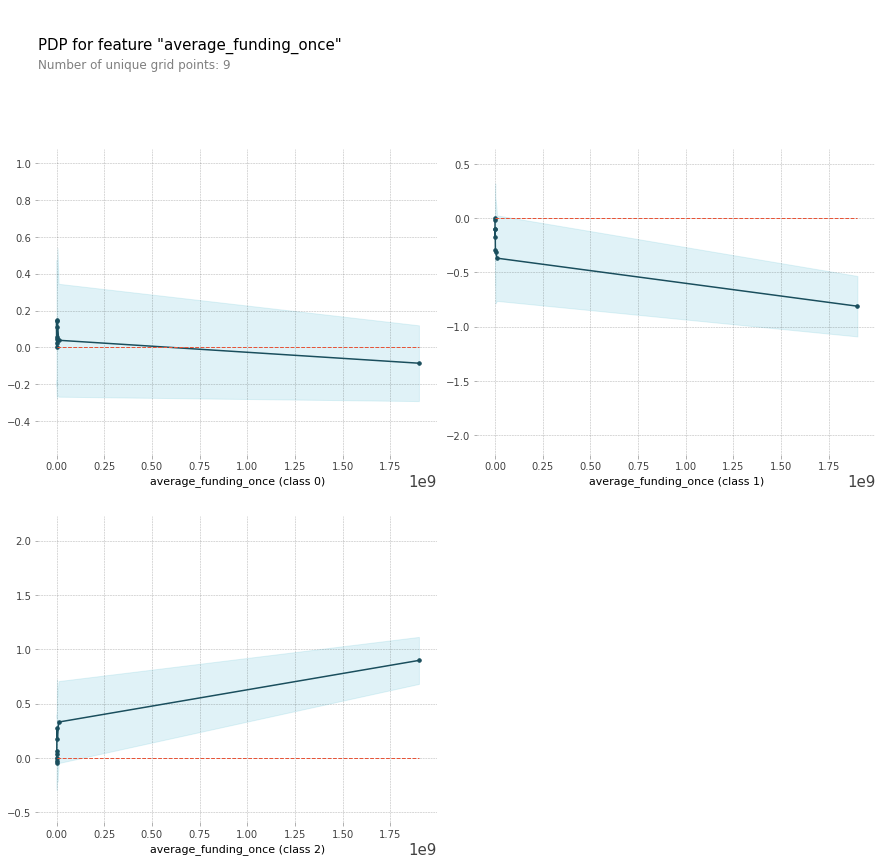

In [165]:
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'average_funding_once'
features = X_test_encoder.columns
pdp_dist = pdp.pdp_isolate(model=pipe4, dataset=X_test_encoder, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

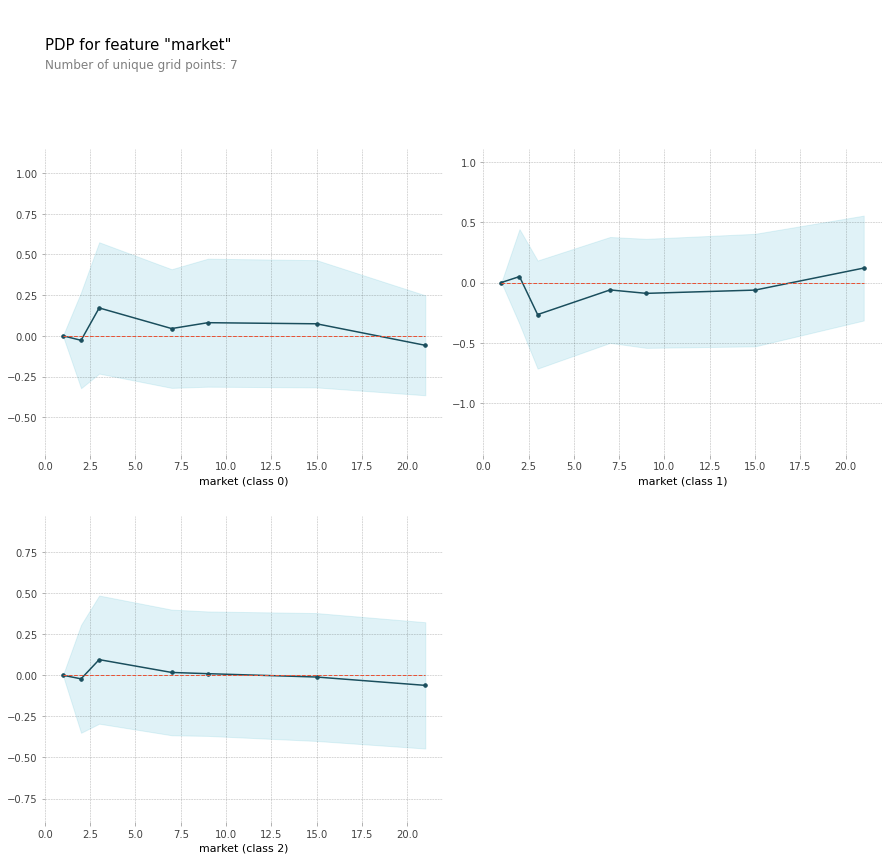

In [170]:
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'market'
features = X_test_encoder.columns
pdp_dist = pdp.pdp_isolate(model=pipe4, dataset=X_test_encoder, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

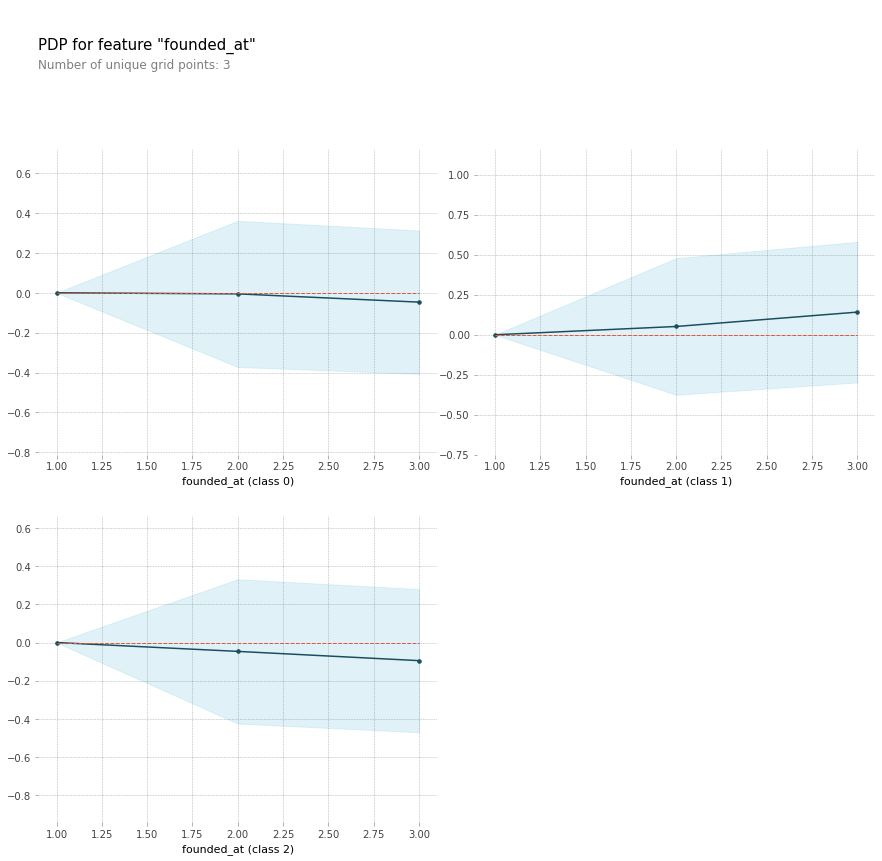

In [172]:
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'founded_at'
features = X_test_encoder.columns
pdp_dist = pdp.pdp_isolate(model=pipe4, dataset=X_test_encoder, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

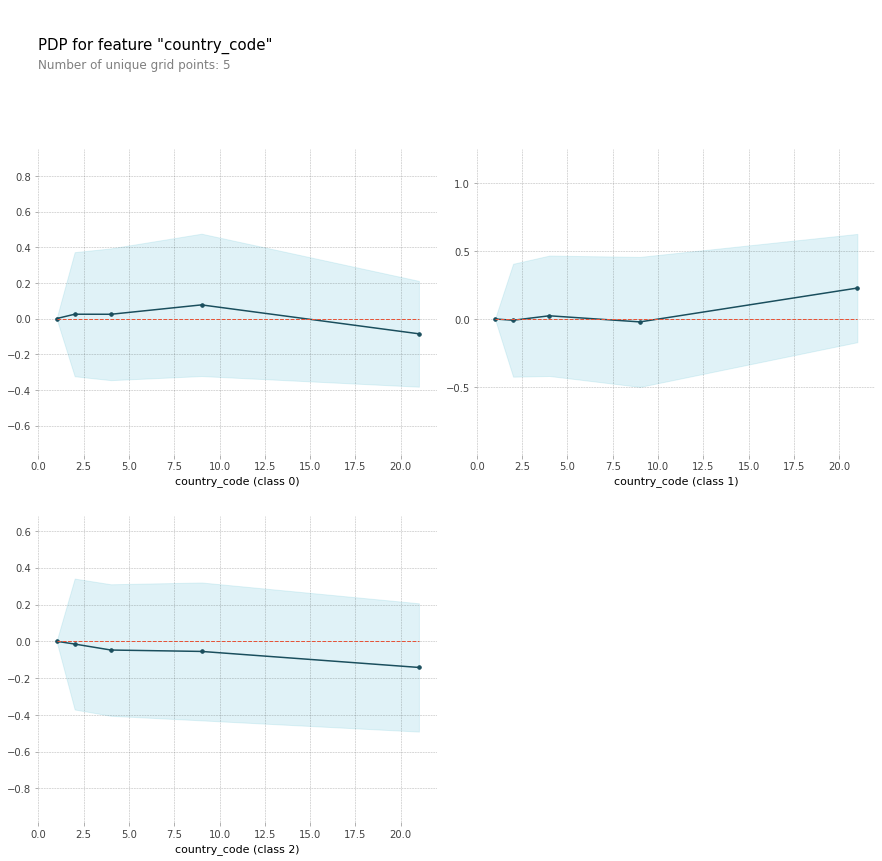

In [173]:
import matplotlib.pyplot as plt
from pdpbox import pdp
feature = 'country_code'
features = X_test_encoder.columns
pdp_dist = pdp.pdp_isolate(model=pipe4, dataset=X_test_encoder, model_features=features, feature=feature)
pdp.pdp_plot(pdp_dist, feature);

In [66]:
import shap
import skimage
shap.initjs()

In [68]:
knn = KNeighborsClassifier(weights = 'distance', n_neighbors = 3, metric = 'euclidean')
knn.fit(X_train_over, y_train_over)

# Get the model explainer object
explainer = shap.KernelExplainer(knn.predict_proba, X_train_over)

# Get shap values for the test data observation whose index is 0, i.e. first observation in the test set
shap_values = explainer.shap_values(X_test_encoder.iloc[0,:])

# Generate a force plot for this first observation using the derived shap values
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_encoder.iloc[0,:])

Using 97011 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


In [63]:
shap_values = explainer.shap_values(X_test_encoder)
shap.force_plot(explainer.expected_value[0], shap_values[0], X_test_encoder)

  0%|          | 0/4779 [00:00<?, ?it/s]

KeyboardInterrupt: ignored